In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [2]:
columns=['comment_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_facebook.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,comment_english,label
0,"['suggestion', 'good']",positive
1,"['suggestion', 'cool']",positive
2,"['suggestion', 'cool', '']",positive
3,"['hmmm', 'tips', 'mimin', '']",negative
4,"['ticket', 'responds',' indohome ',' base ',' ...",negative


In [3]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,comment_english,label,polaritas
0,"['suggestion', 'good']",positive,1
1,"['suggestion', 'cool']",positive,1
2,"['suggestion', 'cool', '']",positive,1
3,"['hmmm', 'tips', 'mimin', '']",negative,-1
4,"['ticket', 'responds',' indohome ',' base ',' ...",negative,-1
...,...,...,...
6662,"['', 'hope', 'telkomsel', 'bonus', 'package', ...",negative,-1
6663,['carcass'],negative,-1
6664,"['come on', 'pakek', 'card']",negative,-1
6665,"['person', 'bored', 'card', 'telkom', 'net', '...",negative,-1


In [4]:
x = np.array(df['comment_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(6667,)
(6667,)


In [5]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x)

  (0, 2136)	0.48124181736689536
  (0, 5515)	0.8765878810578023
  (1, 1177)	0.7000190810152668
  (1, 5515)	0.7141241392184843
  (2, 1177)	0.7000190810152668
  (2, 5515)	0.7141241392184843
  (3, 3625)	0.5195938073767749
  (3, 5889)	0.4618163551488557
  (3, 2343)	0.7188518132777667
  (4, 3253)	0.15172459853294748
  (4, 6276)	0.17352451510903802
  (4, 5453)	0.2905176334745425
  (4, 3439)	0.19292494713370617
  (4, 2857)	0.33932851783882695
  (4, 2527)	0.2579482454765181
  (4, 4202)	0.11009650223553125
  (4, 934)	0.16357322656781378
  (4, 2402)	0.1488973662848676
  (4, 1133)	0.13944822280142363
  (4, 3885)	0.12796570401836907
  (4, 4619)	0.156830672323125
  (4, 6241)	0.11482107397725322
  (4, 2882)	0.19292494713370617
  (4, 2460)	0.1260824375002208
  (4, 4131)	0.22757610007141715
  :	:
  (6662, 5495)	0.3165280073824904
  (6663, 903)	1.0
  (6664, 904)	0.35068078027533944
  (6664, 1078)	0.5423912910713037
  (6664, 4302)	0.6302803370373986
  (6664, 4202)	0.4307915673031524
  (6665, 1284)	0.5361

In [6]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (5333,)

 total data test :  (1334,)


In [7]:
print(xtrain.shape)
print(ytrain.shape)

(5333, 6483)
(5333,)


In [8]:
#klasifikasi data (80 : 20)
nb = MultinomialNB()

#memasukkan data training ke dalam klasifikasi naive bayes
nbtrain = nb.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = nbtrain.predict(xtest)
predicted

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [9]:
#Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(xtest)

array([[0.91584371, 0.08415629],
       [0.94624453, 0.05375547],
       [0.86562836, 0.13437164],
       ...,
       [0.96388318, 0.03611682],
       [0.94853696, 0.05146304],
       [0.89581609, 0.10418391]])

In [10]:
print(accuracy_score(ytest, predicted))

0.7901049475262368


In [11]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

          -1       0.78      1.00      0.88       986
           1       0.97      0.20      0.33       348

    accuracy                           0.79      1334
   macro avg       0.88      0.60      0.60      1334
weighted avg       0.83      0.79      0.73      1334



In [12]:
Final = df[['comment_english', 'label', 'polaritas']]
Final = Final.rename(columns={'comment_english':'Comments', 'label':'Label', 'polaritas':'Polaritas'})
Final.to_excel('hasil_analisis_facebook.xlsx')

In [13]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[984,   2],
       [278,  70]], dtype=int64)

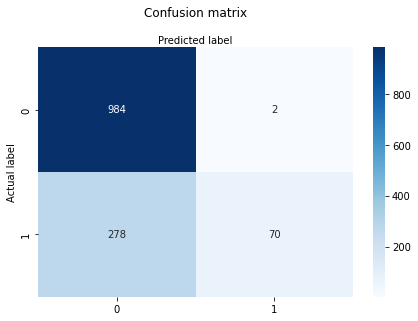

In [14]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
wordcloud = pd.Series(" ".join(df["comment_english"]).split())
len(wordcloud)

58099

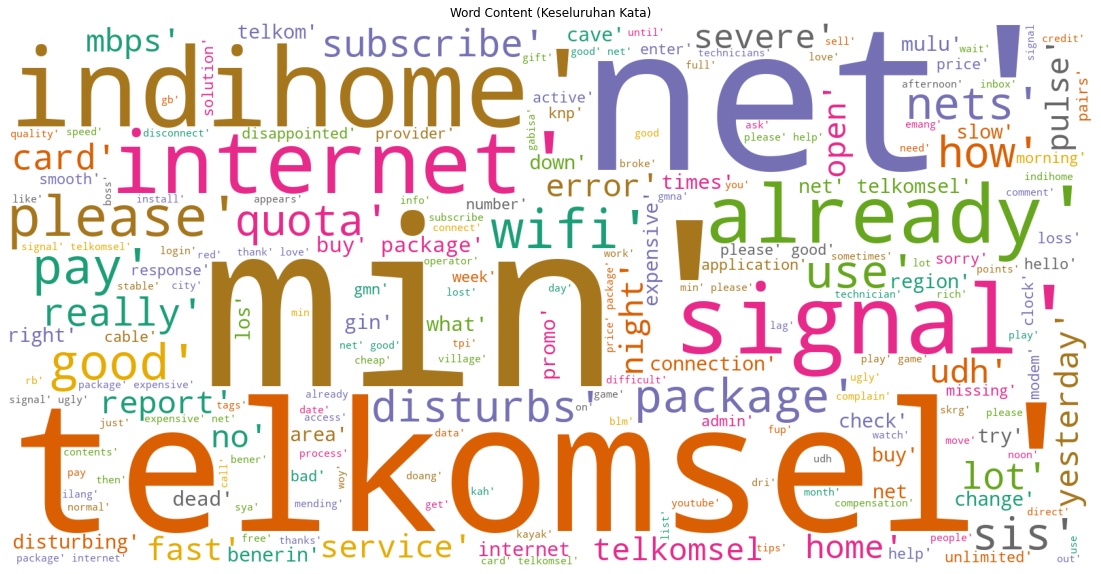

In [16]:
datacloud = " ".join(wordcloud)

%matplotlib inline
# Bigram (per dua kata) -> "collocations = True"
wordcloud_cld = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2").generate(datacloud)
plt.figure(figsize = (20, 10))
plt.title("Word Content (Keseluruhan Kata)")
plt.imshow(wordcloud_cld)
plt.axis("off")
plt.show()

In [17]:
label_score = df["label"].value_counts()
label_score

negative    4996
positive    1671
Name: label, dtype: int64

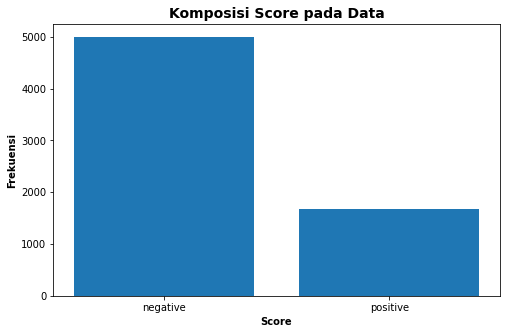

In [18]:
label_score_x = label_score.index
label_score_y = label_score.values

plt.figure(figsize = (8, 5))
plt.bar(label_score_x, label_score_y)
plt.xlabel("Score", fontweight = 'bold')
plt.ylabel("Frekuensi", fontweight = 'bold')
plt.title("Komposisi Score pada Data", fontweight = 'bold', fontsize = 14)
plt.show()

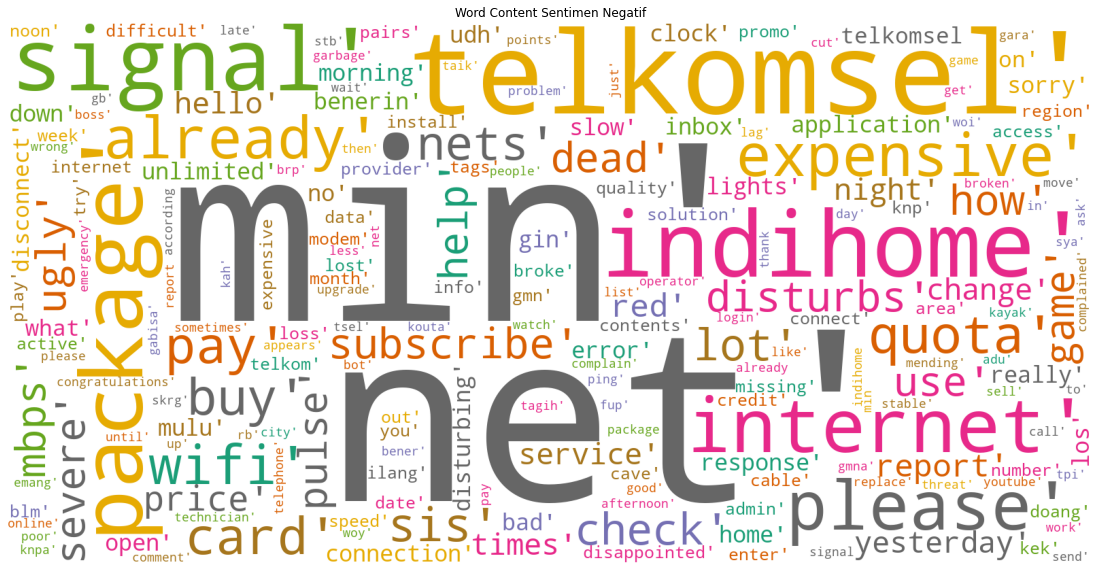

In [19]:
word_negatif = pd.Series(" ".join(df[df["polaritas"]== -1] ["comment_english"]).split())
data_negatif = " ".join(word_negatif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_negatif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(data_negatif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Negatif")
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.show()

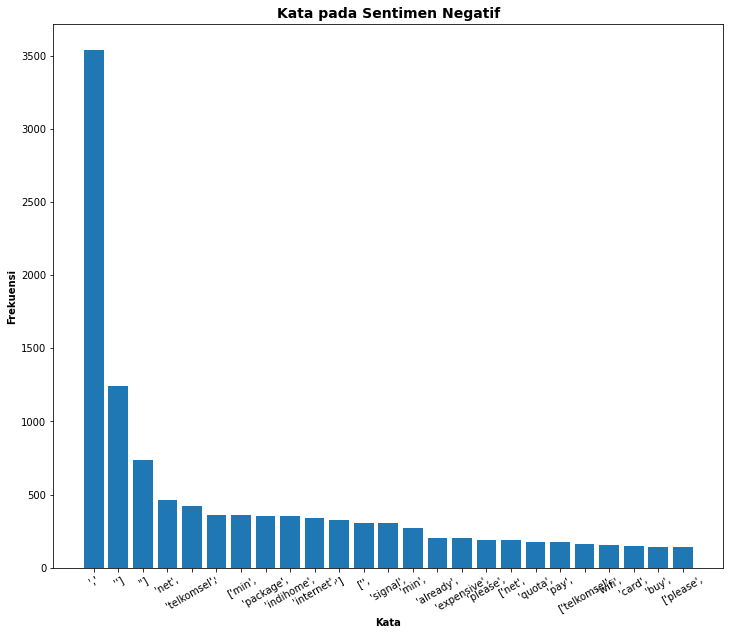

In [20]:
negatif_kata = word_negatif.value_counts().nlargest(25)

negatif_x = negatif_kata.index
negatif_y = negatif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(negatif_x, negatif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Negatif", fontweight ='bold', fontsize = 14)
plt.xticks(negatif_x, rotation = 30)
plt.show()

In [21]:
negatif_score = word_negatif.value_counts()
negatif_score

','             3541
'']             1242
"]               737
'net',           462
'telkomsel',     422
                ... 
kak                1
username           1
forget             1
['danger',         1
'difix']           1
Length: 8131, dtype: int64

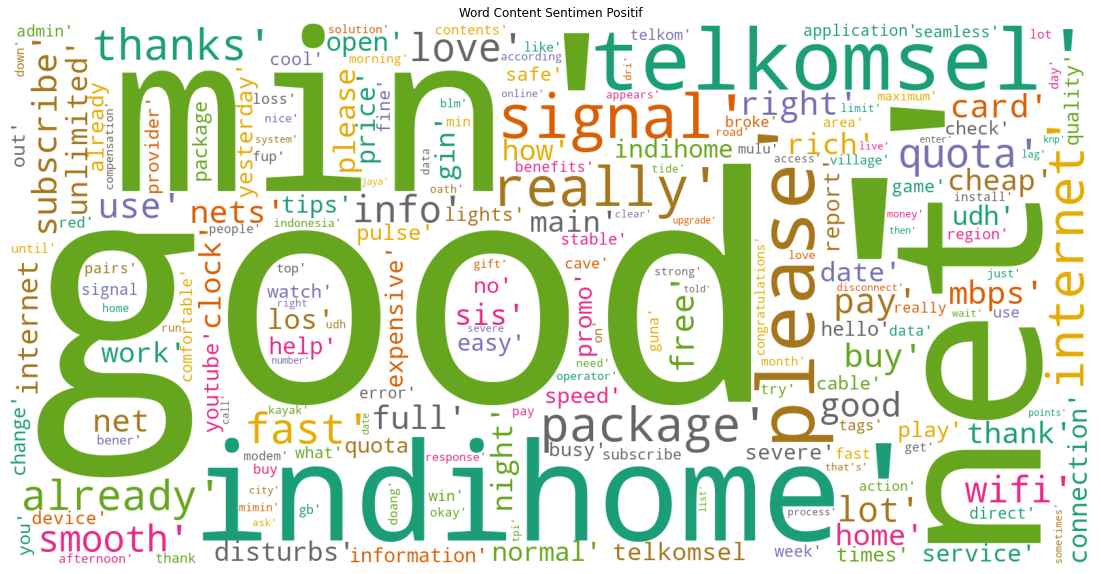

In [22]:
word_positif = pd.Series(" ".join(df[df["polaritas"]== 1] ["comment_english"]).split())
data_positif = " ".join(word_positif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_positif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(data_positif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Positif")
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.show()

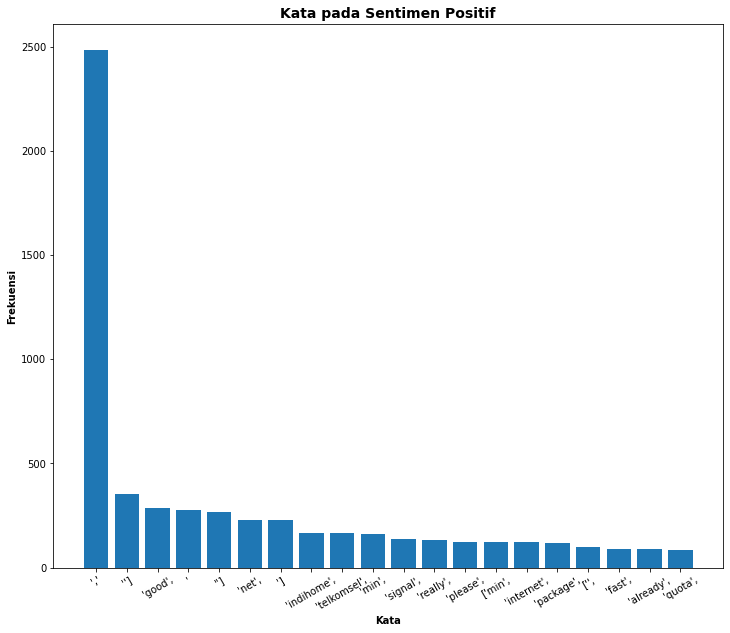

In [23]:
positif_kata = word_positif.value_counts().nlargest(20)

positif_x = positif_kata.index
positif_y = positif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(positif_x, positif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Positif", fontweight ='bold', fontsize = 14)
plt.xticks(positif_x, rotation = 30)
plt.show()

In [24]:
positif_score = word_positif.value_counts()
positif_score

','         2485
'']          354
'good',      286
'            277
"]           267
            ... 
'hbs','        1
torture        1
rame           1
boarding       1
strategy       1
Length: 4708, dtype: int64

In [25]:
ytrain = ytrain.value_counts()
ytrain

-1    4010
 1    1323
Name: polaritas, dtype: int64

In [26]:
ytest = ytest.value_counts()
ytest

-1    986
 1    348
Name: polaritas, dtype: int64